# Práctica 4 - Clasificación

Nombres:
* Sergio de la Cruz
...

En esta práctica, tendréis que predecir la concesión de créditos de un banco. Tenéis los datasets abajo igual que en la práctica anterior.

Esta vez, obligaremos a subir una submission a la competición de kaggle, con premio especial para:
* Los ganadores de la competición
* Todo aquel que supere la precisión obtenida por los mentores

Podéis encontrar la URL de kaggle (donde se encuentran, entre otras cosas, los criterios de evaluación) aquí:
https://www.kaggle.com/t/9c6fa1489e714d45889b013bd2abd267

Suerte!

In [1]:
train_url = "https://gist.githubusercontent.com/w-dan/5b1d67c4f507b2b826ed90bec372f1a4/raw/24679757c6bf9bcc74ef4d7944196a1f37b93eba/train3.csv"
test_url = "https://gist.githubusercontent.com/w-dan/5b1d67c4f507b2b826ed90bec372f1a4/raw/24679757c6bf9bcc74ef4d7944196a1f37b93eba/test3.csv"

Un consejo para las submissions:

Guardad la columna `ID` al principio, así podéis droppear sin riesgos


```python
df_test = pd.read_csv(test_url)
submission = df_test[['ID']].copy()      # preparamos un dataframe con una columna 'ID'
```


Y ahora, para montar la submission:

```python
mis_predicciones = mi_clasificador.predict(df_test)

# al final del ejercicio, guardamos las predicciones en el dataframe 'submission' que creamos al principio
submission['Credit_Score'] = y_pred_dftest

# si habéis cambiado a números (algunos algoritmos lo requieren) la variable objetivo, revertid los cambios, por ejemplo, asi:
submission.Credit_Score = submission.Credit_Score.replace({0: "Poor", 1: "Standard", 2: "Good"})

```

Para guardarla como csv y subirla a kaggle:

```python
submission.to_csv("./mi_submission.csv", index=False)

# o si usáis google colab, os dejo una forma cómoda de descargar el csv:
from google.colab import files
submission.to_csv('mi_submission.csv', index=False)
files.download('mi_submission.csv')
```

Y directos a la cima del ranking :D


¡Mucha suerte!

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import re

In [3]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train_df.head(4)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,43161,3985,4,Lawrencez,40.0,856431180.0,Accountant,97384.44,8167.370000,1.0,3.0,8.0,1.0,Debt Consolidation Loan,20.0,12.0,0.52,3.0,Good,405.45,32.643281,336.0,No,77.284943,53.714219,High_spent_Large_value_payments,847.172909,Standard
1,40663,49494,2,Mohammedr,39.0,417453942.0,Writer,31369.58,2607.131667,8.0,9.0,27.0,8.0,"Home Equity Loan, Not Specified, Not Specified...",30.0,25.0,19.70,6.0,Bad,4259.91,39.375507,144.0,Yes,171.748418,44.990811,High_spent_Large_value_payments,280.855383,Standard
2,111059,2925,6,Alistairn,17.0,499528888.0,Writer,30171.86,2772.321667,6.0,7.0,30.0,9.0,"Personal Loan, Home Equity Loan, Home Equity L...",49.0,18.0,23.49,10.0,Bad,3406.51,34.039021,123.0,Yes,205.403926,40.781489,High_spent_Large_value_payments,247.322615,Standard
3,72139,21358,2,Dinesh Naire,22.0,859449371.0,Doctor,13100.02,1246.668333,7.0,5.0,6.0,5.0,"Credit-Builder Loan, Credit-Builder Loan, Not ...",6.0,20.0,10.64,8.0,Standard,727.29,34.747262,129.0,Yes,41.177132,23.005463,Low_spent_Large_value_payments,298.156832,Standard


65000


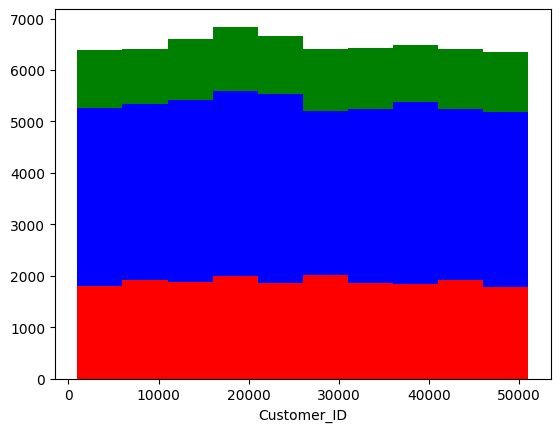

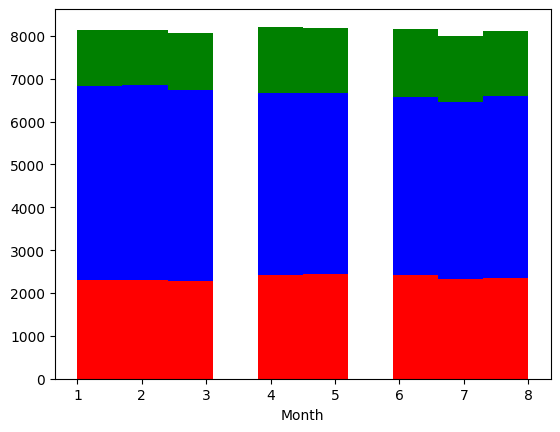

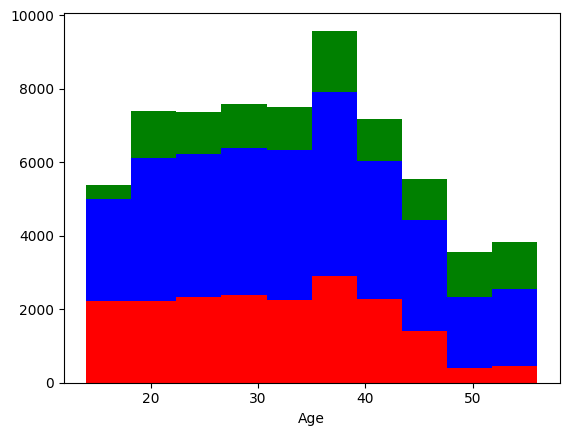

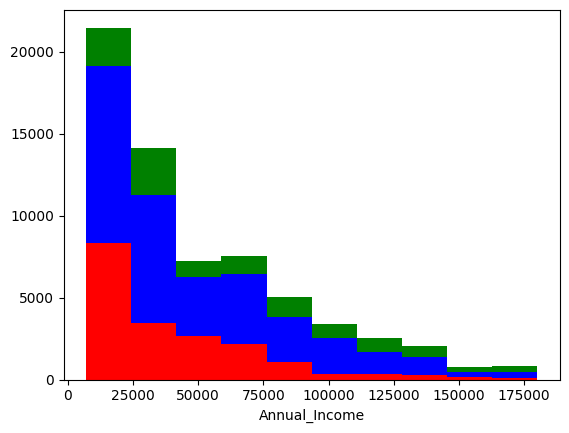

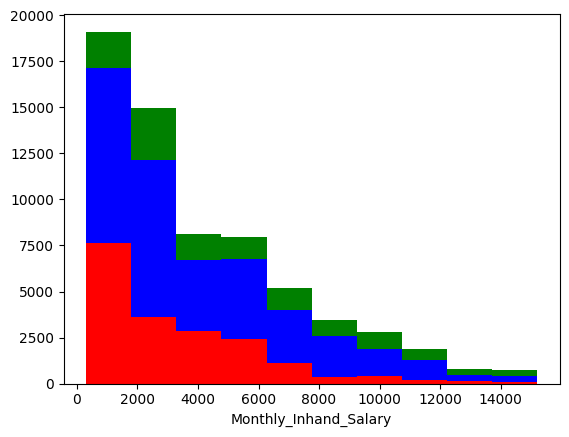

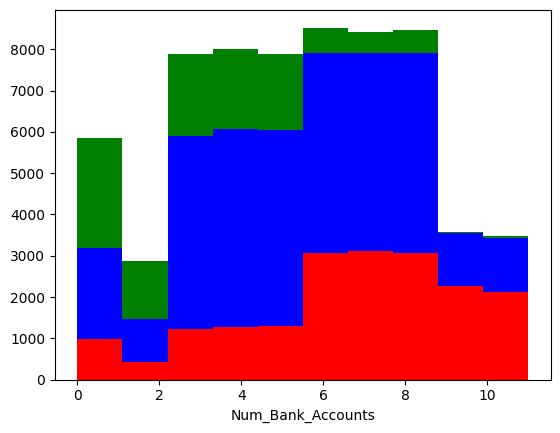

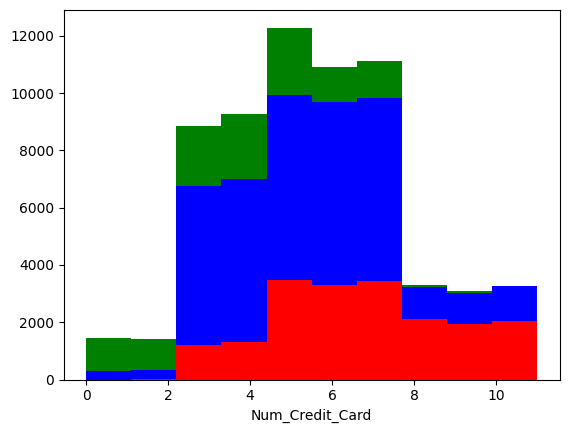

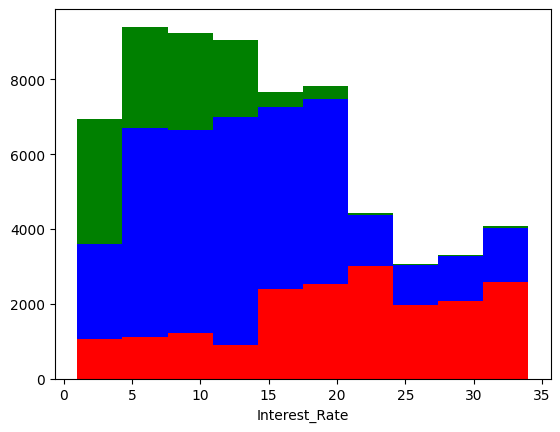

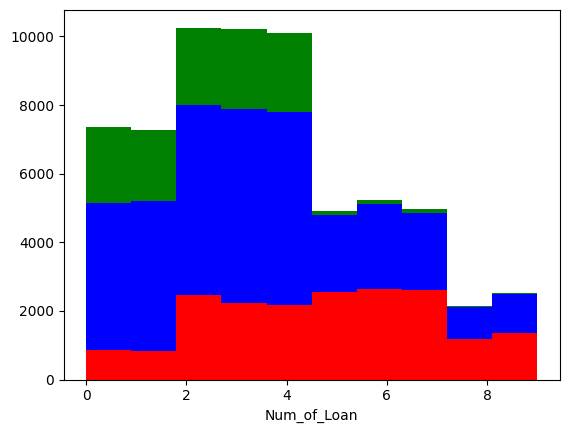

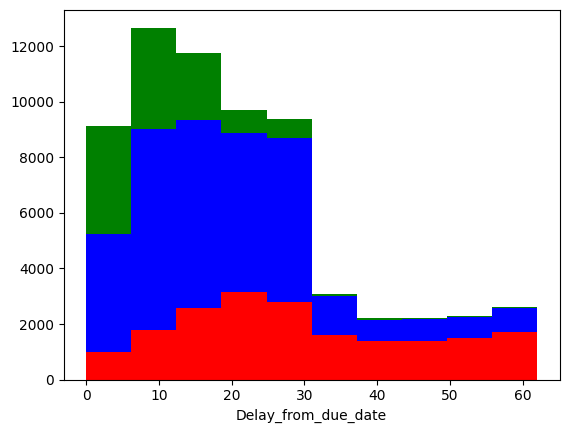

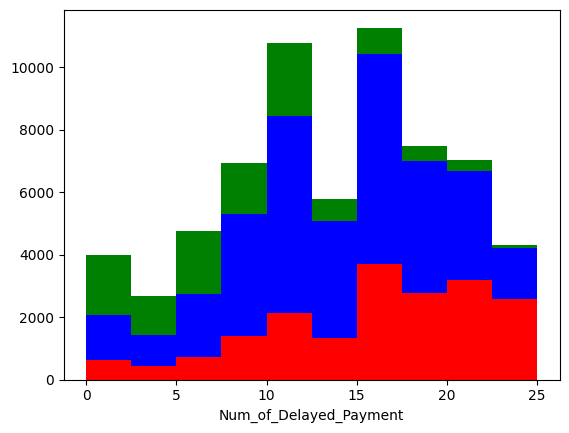

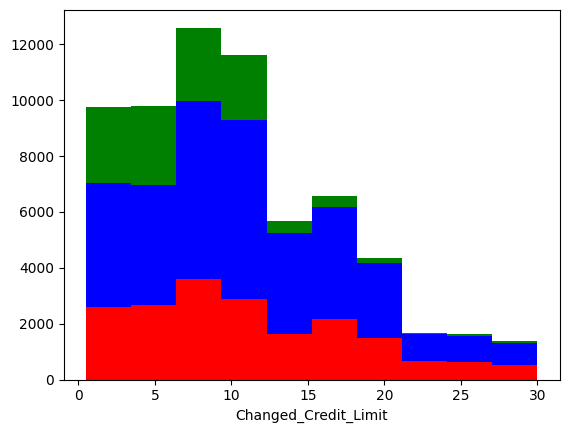

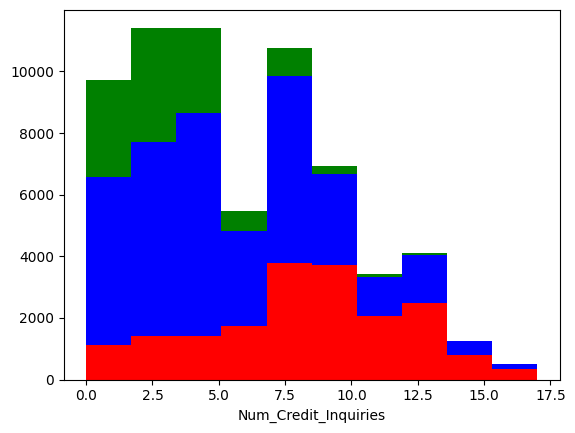

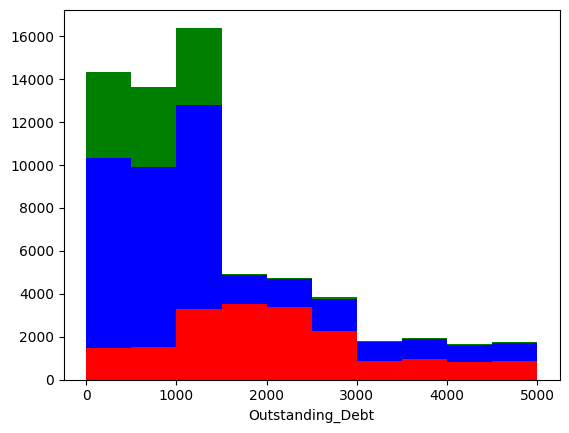

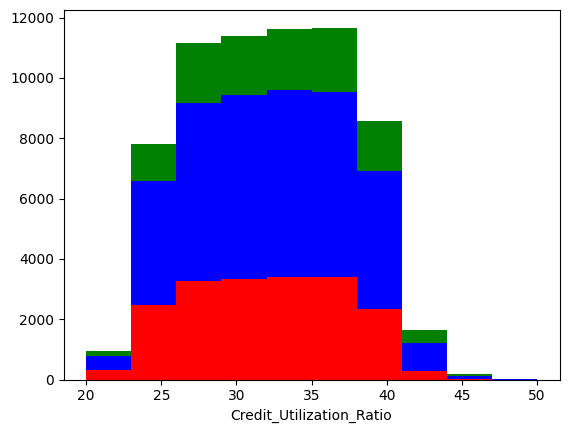

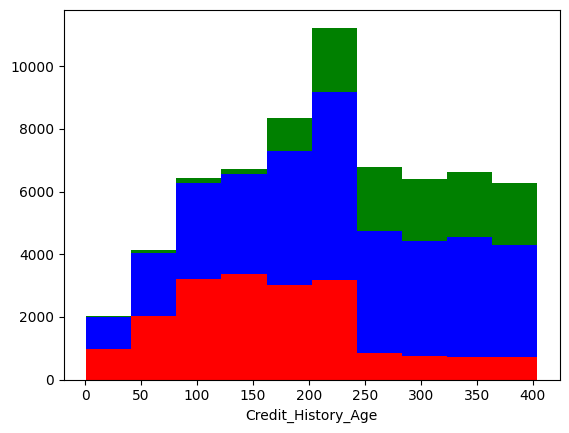

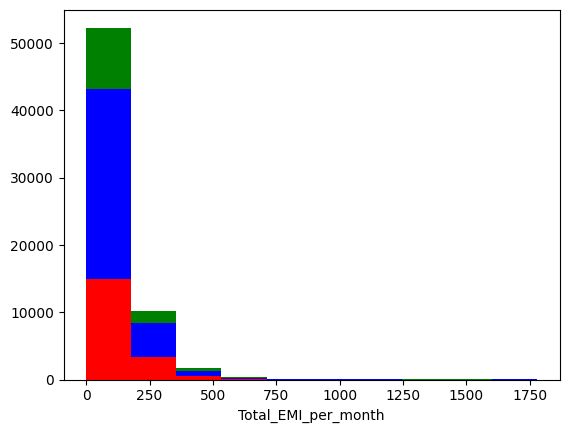

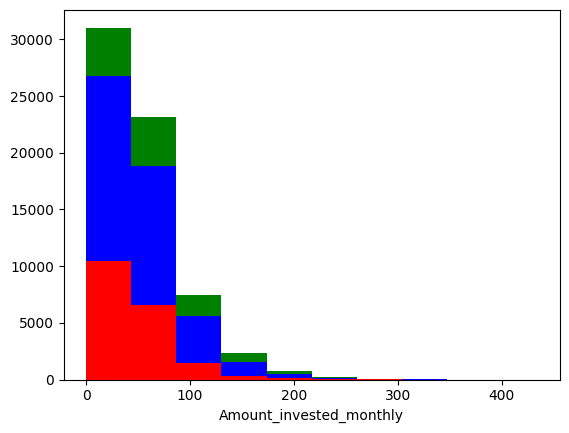

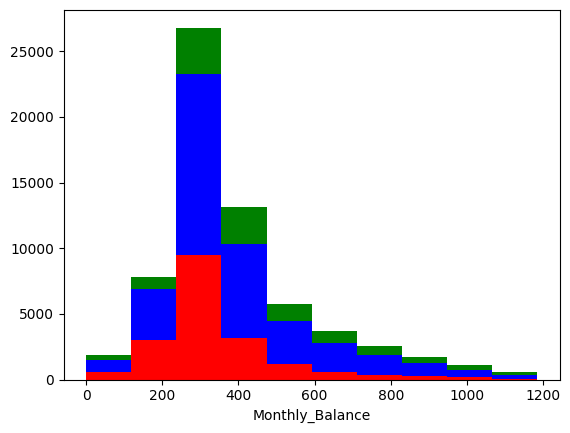

In [6]:
print(train_df.shape[0])
for col in ['Customer_ID','Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
             'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
               'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
               'Credit_History_Age', 'Total_EMI_per_month',	'Amount_invested_monthly',	'Monthly_Balance']:# Crear la gráfica de puntos
    colors = {'Poor': 'r', 'Standard': 'b', 'Good': 'g'}
    plt.figure()
    x=[]
    for score, color in colors.items():
      x.append(train_df[train_df.Credit_Score == score][col])
    plt.hist(x, color=['r','b','g'], stacked=True)
    # plt.hist(train_df[train_df.Credit_Score == 'Standard'][col], color='b')
    # plt.hist(train_df[train_df.Credit_Score == 'Good'][col], color='g')
    # plt.scatter(train_df,data_real, color='b')
    # plt.scatter(train_df[col],data_pred, color='g')
    # plt.scatter(train_df[col],data_pred, color='r')
    # Agregar etiquetas y título
    plt.xlabel(col)
    # Mostrar la gráfica
    plt.show()

Visualizamos la proporcion del Credit_Score en campos que resulten interesantes

Si para algunos valores hay mucha diferencia en el Credit_Score sabremos que son valores clave

65000


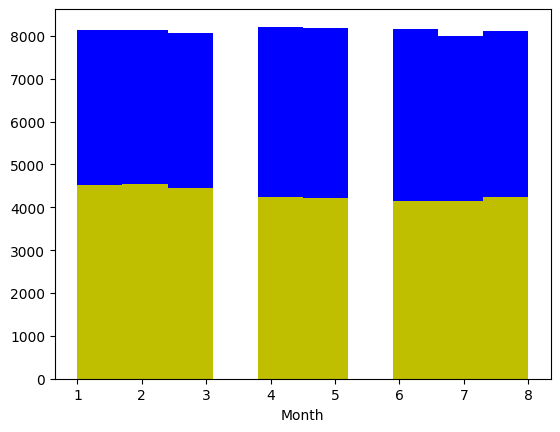

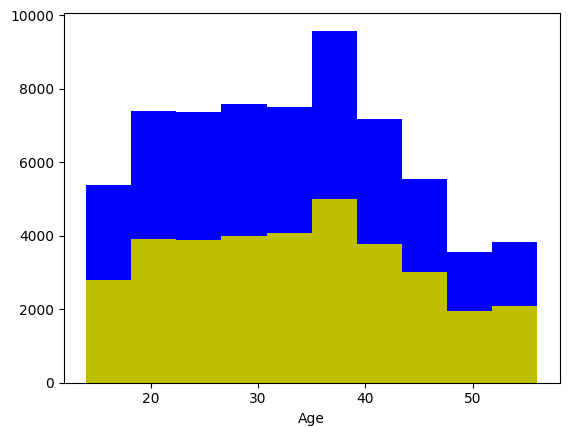

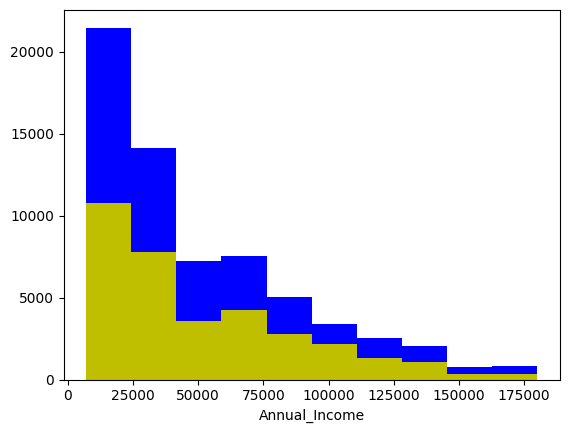

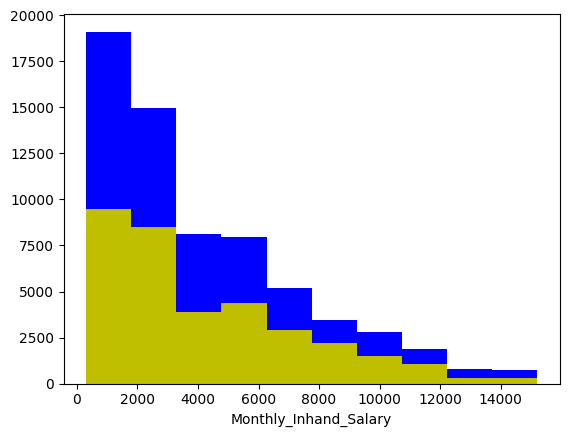

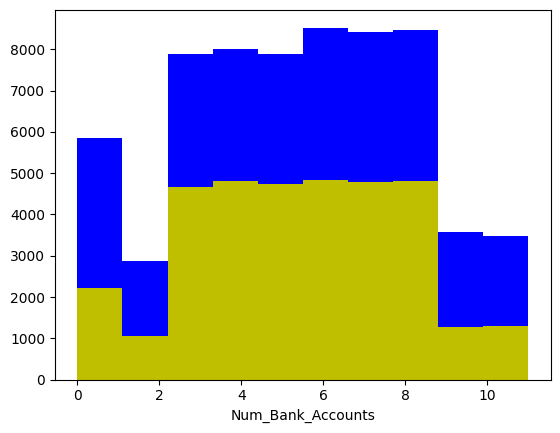

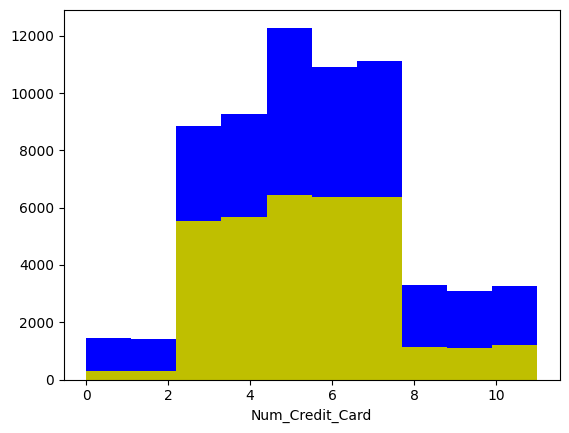

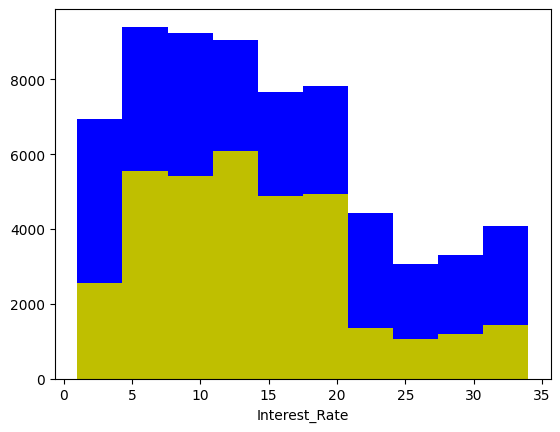

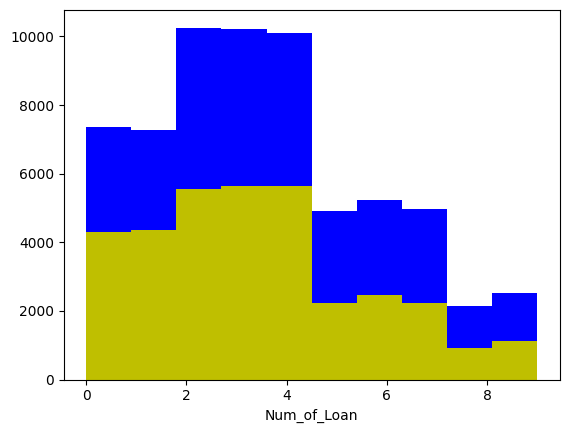

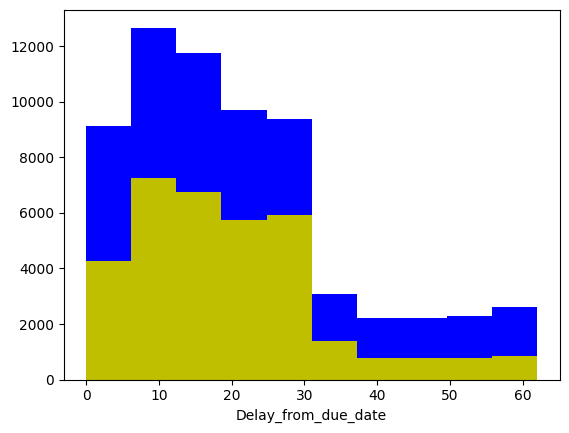

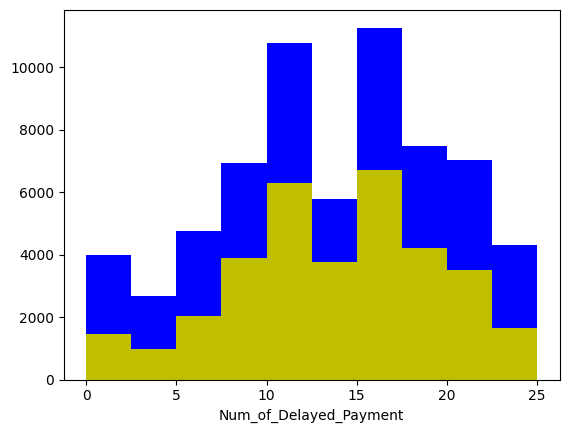

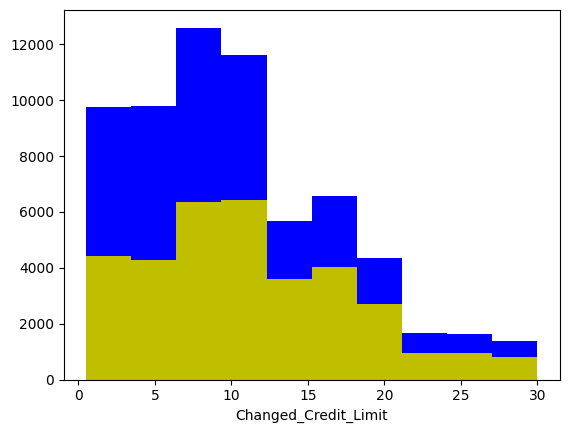

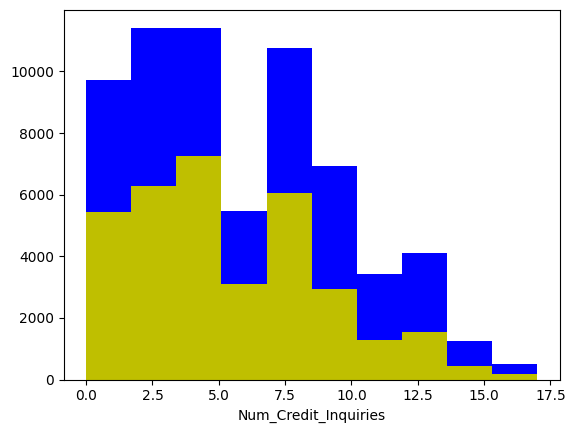

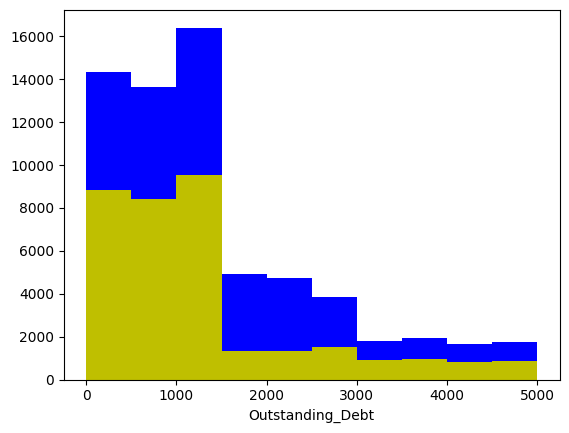

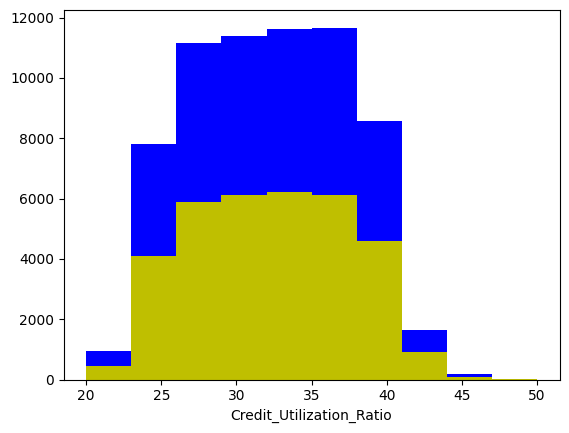

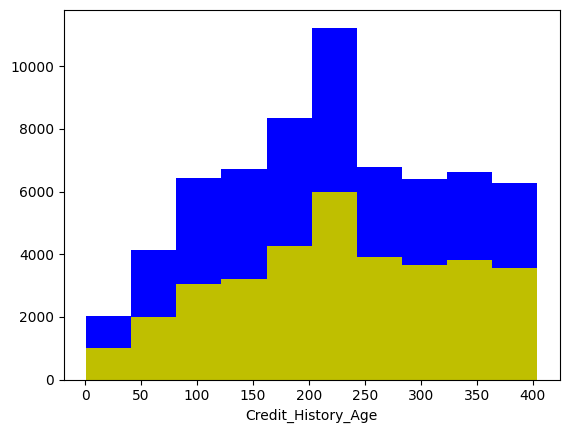

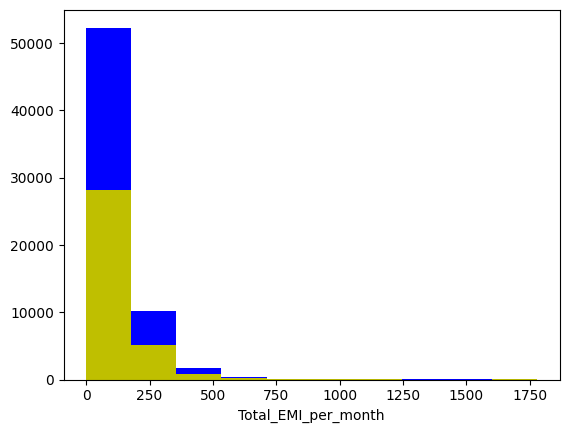

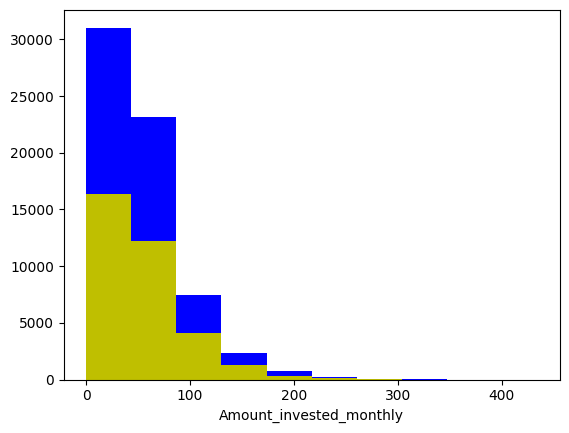

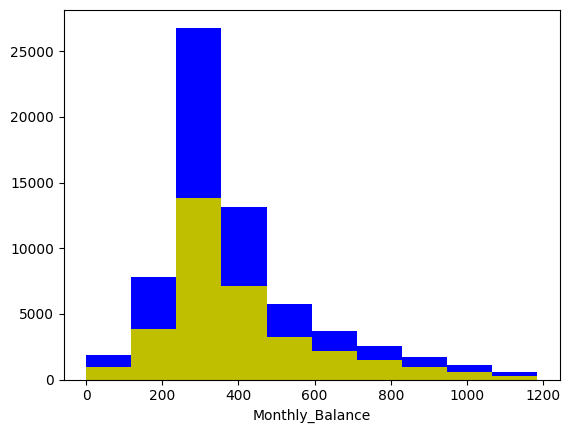

In [7]:
print(train_df.shape[0])
for col in ['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
             'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
               'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
               'Credit_History_Age', 'Total_EMI_per_month',	'Amount_invested_monthly',	'Monthly_Balance']:# Crear la gráfica de puntos
    plt.figure()
    x=[]
    x.append(train_df[train_df.Credit_Score == 'Standard'][col])
    x.append(train_df[train_df.Credit_Score != 'Standard'][col])
    plt.hist(x, color=['y','b'], stacked=True)
    # plt.hist(train_df[train_df.Credit_Score == 'Standard'][col], color='b')
    # plt.hist(train_df[train_df.Credit_Score == 'Good'][col], color='g')
    # plt.scatter(train_df,data_real, color='b')
    # plt.scatter(train_df[col],data_pred, color='g')
    # plt.scatter(train_df[col],data_pred, color='r')
    # Agregar etiquetas y título
    plt.xlabel(col)
    # Mostrar la gráfica
    plt.show()

Hacemos lo mismo que en anterior caso pero esta vez uniendo los valores de 'Good' y 'Poor' para ver os valores que que puedan diferenciar a los valores Standard de los que no lo son

Por desgracia no vemos ninguno significativo

In [8]:
# print(train_df.shape[0])
# for col in ['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
#              'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
#                'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
#                'Credit_History_Age', 'Total_EMI_per_month',	'Amount_invested_monthly',	'Monthly_Balance']:# Crear la gráfica de puntos
#     plt.boxplot(train_df[col])

#     # Agregar etiquetas y título
#     plt.ylabel(col)
#     # Mostrar la gráfica
#     plt.show()

In [9]:
print(train_df.shape[0])
# X_train[X_train.Customer_ID==1011]
print(train_df[['Customer_ID', 'Credit_Score']].drop_duplicates().shape[0])
print(train_df[['ID', 'Credit_Score']].drop_duplicates().shape[0])

65000
18619
65000


Se puntuan a las cuentas bancarias no a las personas

In [10]:
def onehot_encode(train_df, columns_to_encode):
    # columns_to_encode = ['fuel', 'seller_type', 'owner', 'marca', 'transmission']
    for column in columns_to_encode:
        encoder = OneHotEncoder()
        encoded = encoder.fit_transform(train_df[[column]])
        encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out([column]))
        encoded_df = encoded_df.astype(int)
        train_df = pd.concat([train_df, encoded_df], axis=1)
    return train_df
    # train_df[['engine','RPM','transmission', 'fuel_encode', 'seller_type_encode', 'owner_encode',	'marca_encode']] =train_df[['engine','RPM','transmission_encode', 'fuel_encode', 'seller_type_encode', 'owner_encode',	'marca_encode']].astype(int)
    
def ordinal_encode(train_df, columns_to_encode, encode):
    if encode == None:
            encoder = OrdinalEncoder()
    for column in columns_to_encode:
        if encode != None:
            cat = encode.get(column)
            encoder = OrdinalEncoder(categories=[cat])
        train_df[column+'_encode'] = encoder.fit_transform(train_df[[column]])
        train_df[column+'_encode'] = train_df[column+'_encode'].astype(int)
    return train_df

def type_loan_encode(row):
    loans = row['Type_of_Loan'].replace(' and', '').replace(' ', '_').split(',_')
    for loan in loans:
        row[loan] = 1
    return row

def payment_behaviour_encode(row):
    PB = row['Payment_Behaviour'].split('_')
    row['Payment_Behaviour_spent'] = PB[0]
    row['Payment_Behaviour_value_payments'] = PB[2]
    return row

def encode_rows(row):
    row = payment_behaviour_encode(row)
    # row = type_loan_encode(row)
    return row

def less_digits(new_train_df):
    study_train_df = new_train_df.astype(int)

    study_train_df.Age = study_train_df.Age/10
    study_train_df.Amount_invested_monthly	 = study_train_df.Amount_invested_monthly/10
    study_train_df.Annual_Income = study_train_df.Annual_Income/10000
    study_train_df.Changed_Credit_Limit = study_train_df.Changed_Credit_Limit/10
    study_train_df.Credit_History_Age = study_train_df.Credit_History_Age/100
    study_train_df.Credit_Utilization_Ratio = study_train_df.Credit_Utilization_Ratio/10
    # study_train_df.Customer_ID = study_train_df.Customer_ID/10000
    study_train_df.Delay_from_due_date = study_train_df.Delay_from_due_date/10
    # study_train_df.ID = study_train_df.ID/10000
    study_train_df.Interest_Rate = study_train_df.Interest_Rate/10
    study_train_df.Monthly_Balance = study_train_df.Monthly_Balance/100
    study_train_df.Monthly_Inhand_Salary = study_train_df.Monthly_Inhand_Salary/1000
    study_train_df.Num_of_Delayed_Payment = study_train_df.Num_of_Delayed_Payment/10
    study_train_df.Outstanding_Debt = study_train_df.Outstanding_Debt/1000
    study_train_df.Total_EMI_per_month = study_train_df.Total_EMI_per_month/100

    study_train_df = study_train_df.astype(int).drop_duplicates()
    return study_train_df

def preproceso(train_df):

    # train_df = train_df.drop_duplicates()
    if 'Credit_Score' in train_df.columns:
        train_df = train_df.dropna().reset_index(drop=True)
    train_df = train_df.apply(lambda x: encode_rows(x), axis=1 )
    # for col in train_df.columns:
    #     if col.find('_Loan')!=-1:
    #         train_df[col] = train_df[col].fillna(0)
    # train_df['Not_Specified'] = train_df['Not_Specified'].fillna(0)
    # train_df['No_Data'] = train_df['No_Data'].fillna(0)


    train_df.Credit_Mix = train_df.Credit_Mix.replace({"Bad": 0, "Standard": 1, "Good": 2})
    if 'Credit_Score' in train_df.columns:
        train_df.Credit_Score = train_df.Credit_Score.replace({"Poor": 0, "Standard": 1, "Good": 2})
    train_df.Payment_Behaviour_spent = train_df.Payment_Behaviour_spent.replace({"High": 0, "Low": 1})
    train_df.Payment_Behaviour_value_payments = train_df.Payment_Behaviour_value_payments.replace({"Medium": 0, "Large": 1, "Small": 2})
    train_df.Payment_of_Min_Amount = train_df.Payment_of_Min_Amount.replace({"No": 0, "NM": 1, "Yes":2})
    # columns_to_encode = ['Credit_Mix',	'Credit_Score', 'Occupation', 'Payment_Behaviour_spent', 'Payment_Behaviour_value_payments', 'Payment_of_Min_Amount']
    # train_df = onehot_encode(train_df, ['Occupation'])


    train_df = train_df.drop(['Name', 'Type_of_Loan', 'Payment_Behaviour', 'Occupation','SSN','Customer_ID', 'Month'], axis=1)

    train_df = less_digits(train_df)

    return train_df

new_train_df = preproceso(train_df)


En el preproceso enumeramos los valores de Credit_Mix, Credit_Score, Payment_of_Min_Amount, a parte de borrar nulos y campos que no nos interesan

tambien se provó a extraer los valores de Type_of_Loan y Payment_Behaviour pero mas adelante vimos que no aportaban gran cosa por lo que los eliminamos

ademas los valores muy grandes o con mas precision los simplificamos quedandonos solo con los primeros digitos hasta tener valores entre 1 y 20 

In [11]:
new_train_df

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_Behaviour_spent,Payment_Behaviour_value_payments
0,43161,4,9,8,1,3,0,1,2,1,0,3,2,0,3,3,0,0,5,8,1,0,1
1,40663,3,3,2,8,9,2,8,3,2,1,6,0,4,3,1,2,1,4,2,1,0,1
2,111059,1,3,2,6,7,3,9,4,1,2,10,0,3,3,1,2,2,4,2,1,0,1
3,72139,2,1,1,7,5,0,5,0,2,1,8,1,0,3,1,2,0,2,2,1,1,1
4,119841,2,6,5,6,2,1,4,2,0,1,9,1,0,2,1,1,1,6,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64995,22570,4,1,1,3,3,1,1,2,1,1,2,1,0,2,3,2,1,4,2,2,1,1
64996,134156,2,3,2,4,5,2,4,3,0,0,7,1,0,3,3,1,0,3,4,1,0,1
64997,145951,1,1,1,6,10,2,6,2,2,2,10,0,4,3,0,2,0,2,2,0,1,0
64998,27919,1,12,10,2,5,0,4,1,0,0,1,2,1,3,2,1,3,16,4,1,0,2


65000


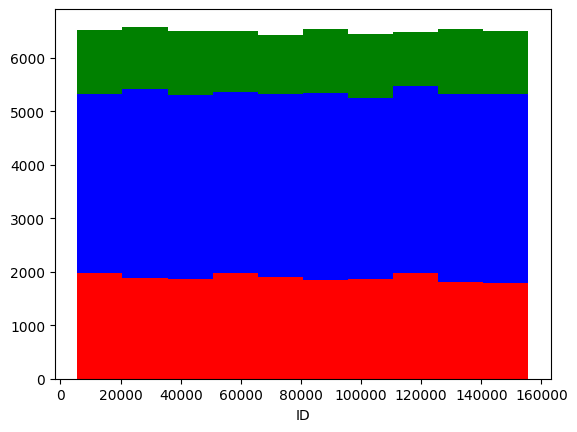

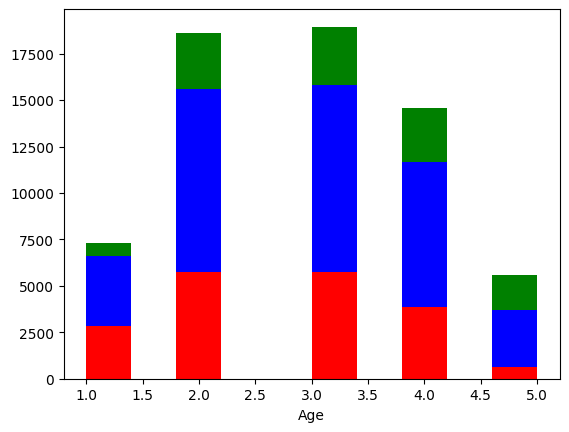

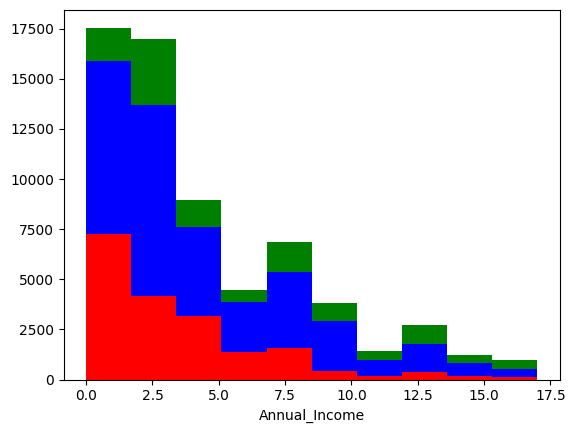

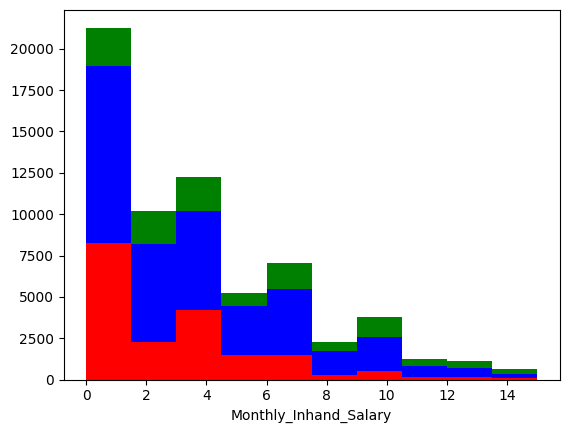

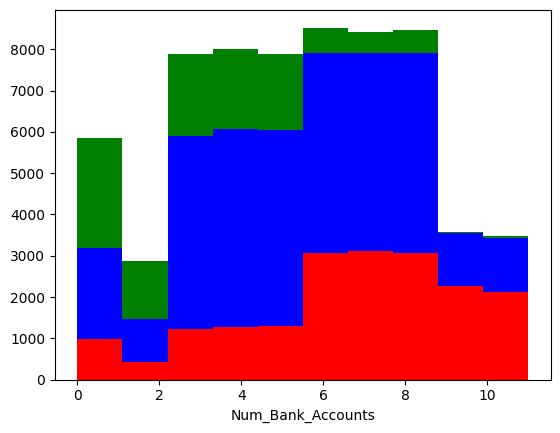

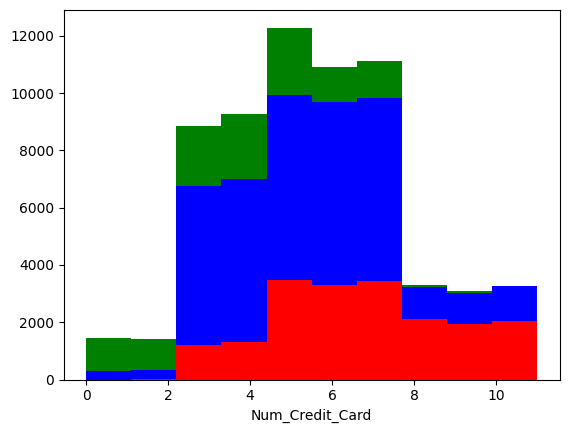

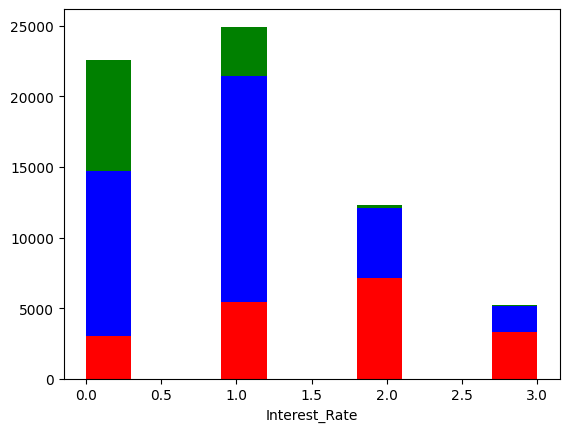

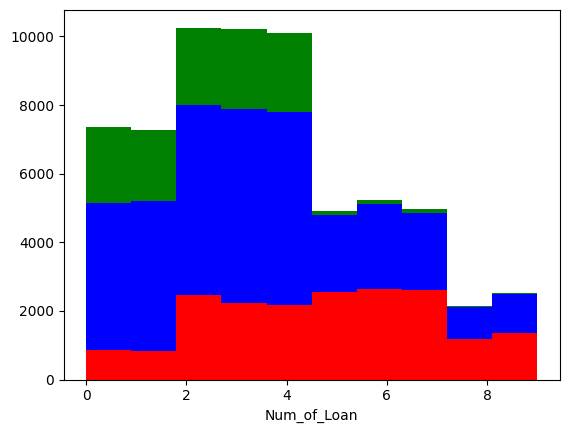

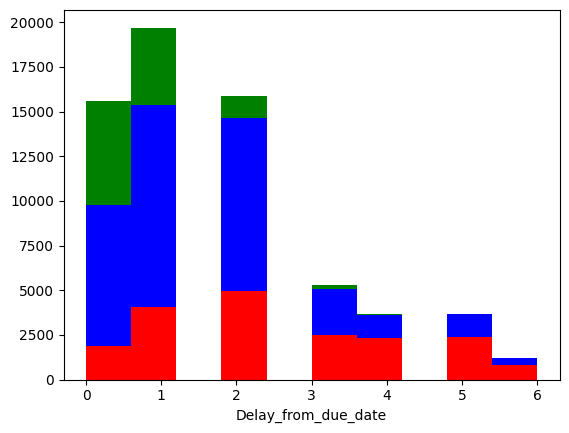

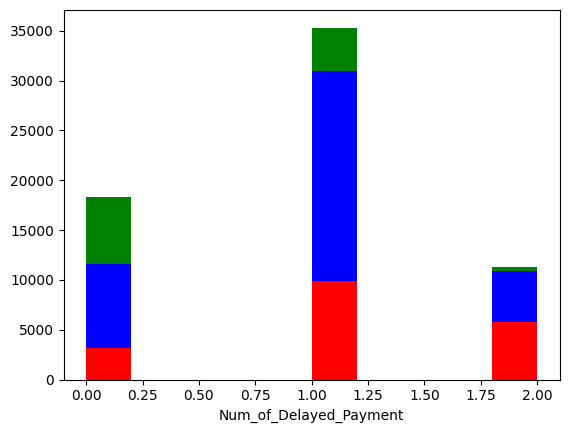

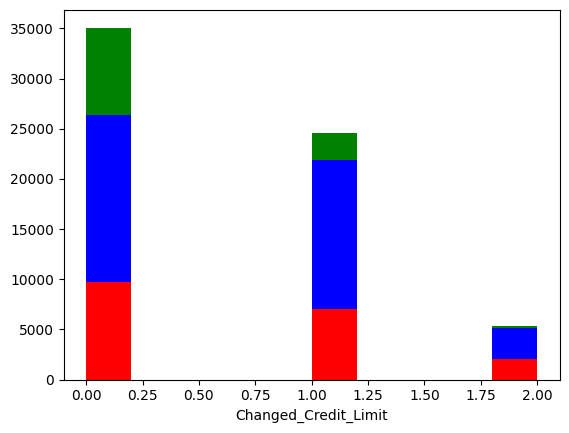

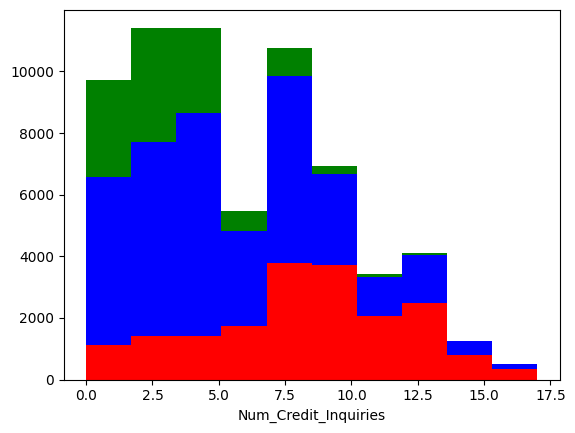

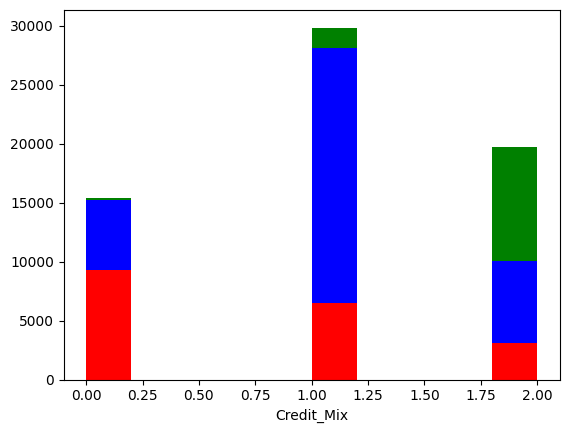

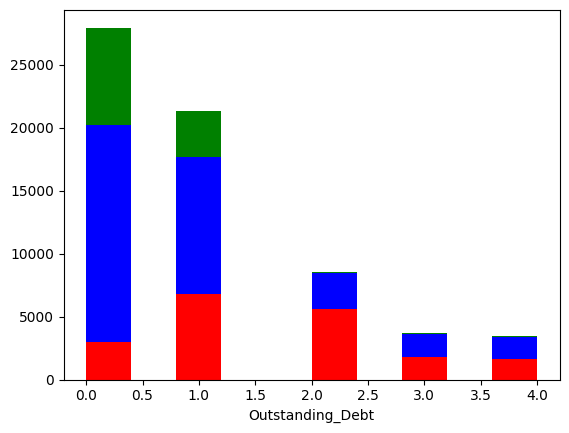

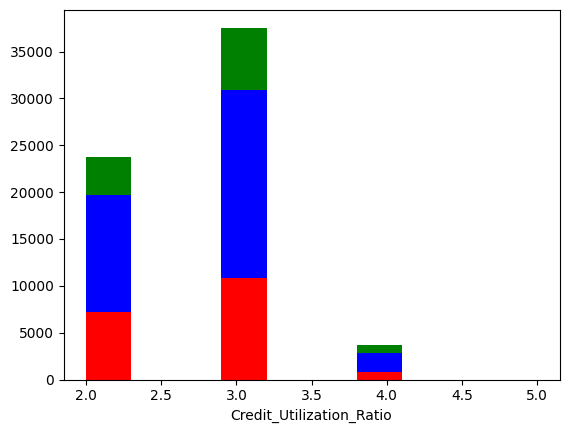

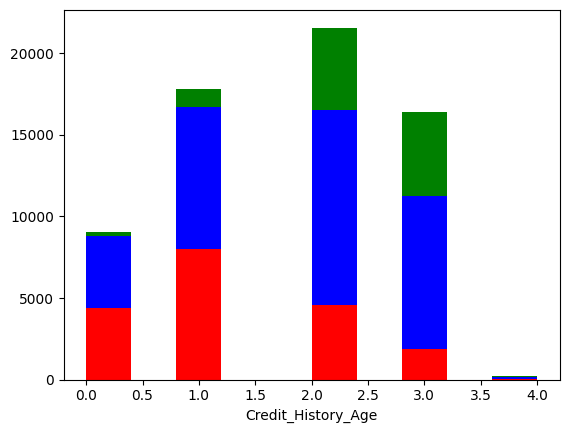

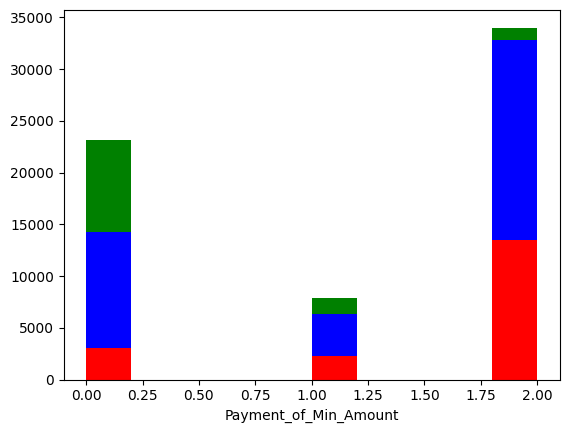

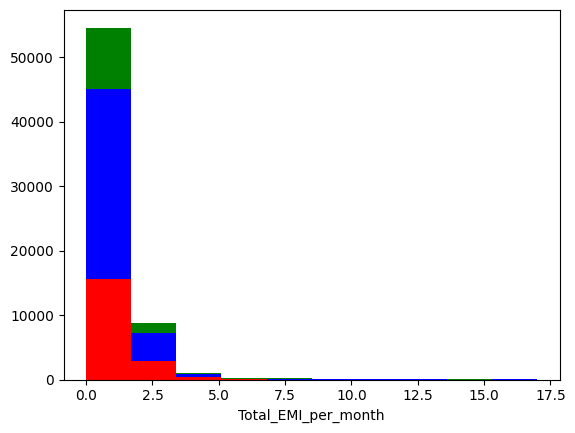

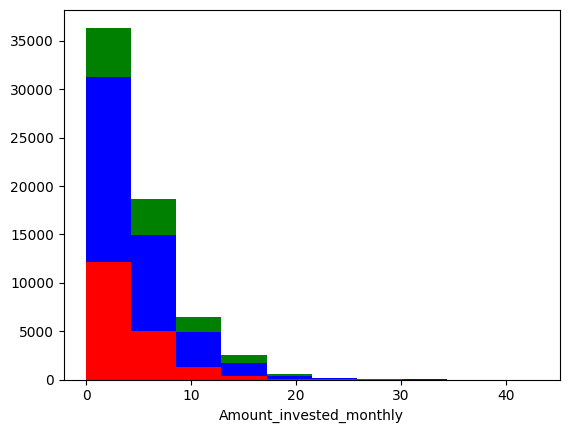

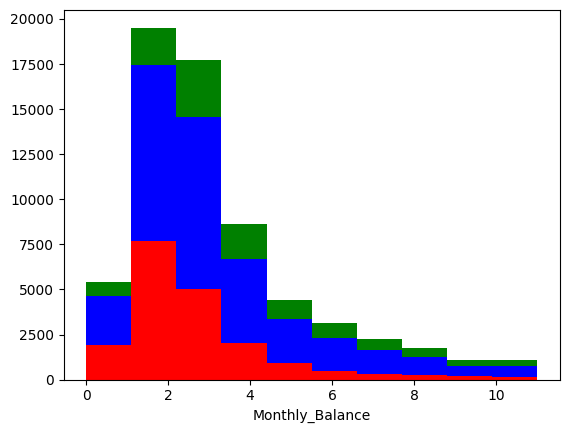

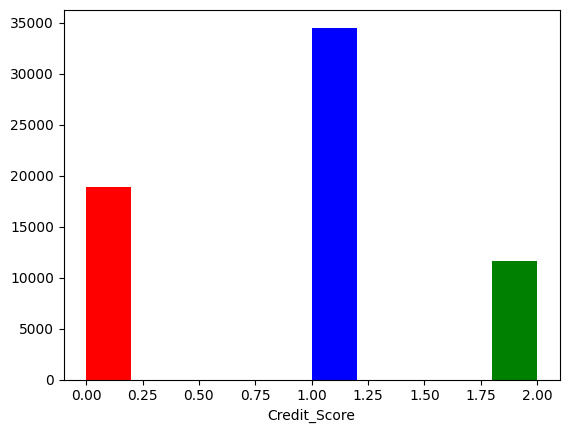

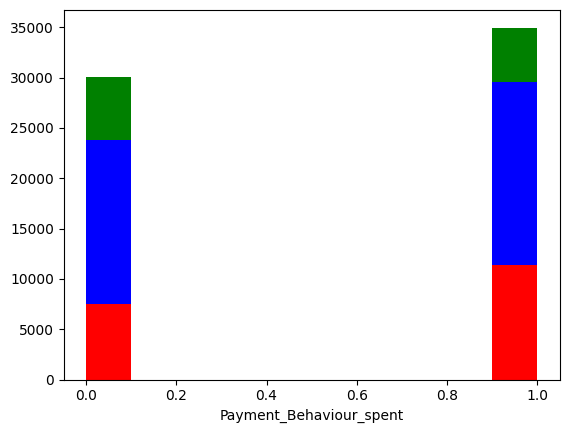

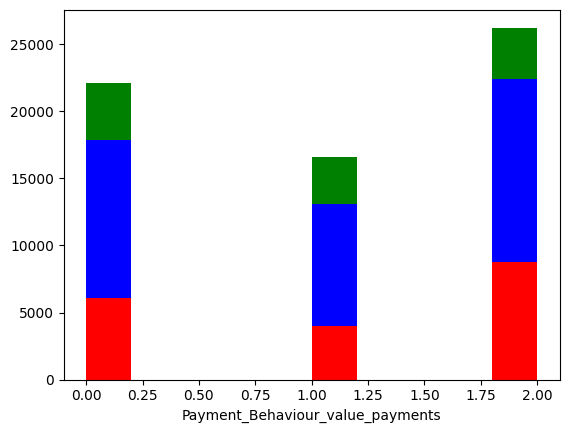

In [12]:
print(new_train_df.shape[0])
for col in new_train_df.columns:# Crear la gráfica de puntos
    colors = {0: 'r', 1: 'b', 2: 'g'}
    plt.figure()
    x=[]
    for score, color in colors.items():
      x.append(new_train_df[new_train_df.Credit_Score == score][col])
    plt.hist(x, color=['r','b','g'], stacked=True)
    # plt.hist(train_df[train_df.Credit_Score == 'Standard'][col], color='b')
    # plt.hist(train_df[train_df.Credit_Score == 'Good'][col], color='g')
    # plt.scatter(train_df,data_real, color='b')
    # plt.scatter(train_df[col],data_pred, color='g')
    # plt.scatter(train_df[col],data_pred, color='r')
    # Agregar etiquetas y título
    plt.xlabel(col)
    # Mostrar la gráfica
    plt.show()

In [13]:
print(new_train_df.Credit_Score.mean())
for col in new_train_df.columns.difference(['Name', 'Type_of_Loan', 'Occupation', 'SSN', 'Credit_Score']):
    print(pd.DataFrame(new_train_df.groupby(col)['Credit_Score'].mean()))

0.8881538461538462
     Credit_Score
Age              
1        0.701923
2        0.854935
3        0.860943
4        0.932483
5        1.219626
                         Credit_Score
Amount_invested_monthly              
0                            0.603728
1                            0.717363
2                            0.832836
3                            0.848504
4                            0.832579
5                            0.899894
6                            0.901491
7                            0.973665
8                            1.000348
9                            1.013861
10                           1.069277
11                           1.075988
12                           1.059813
13                           1.245007
14                           1.184211
15                           1.126338
16                           1.230958
17                           1.140288
18                           1.164773
19                           1.375000
20                 

In [14]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
def evalua(y_test, data_pred):
    print("Accuracy:", metrics.accuracy_score(y_test, data_pred))
    print("F1:", metrics.f1_score(y_test, data_pred, average='weighted'))
    cm =  metrics.confusion_matrix(y_test, data_pred)
    plt.figure(figsize=[3,3])
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    # RocCurveDisplay.from_predictions(
    #     y_test,
    #     data_pred,
    #     name=f"{'WDBC-Malignant'} vs the rest",
    #     color="darkorange",
    # )

    # plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    # plt.axis("square")
    # plt.xlabel("False Positive Rate")
    # plt.ylabel("True Positive Rate")
    # plt.legend()
    # plt.show()

In [22]:
n_fit=int(new_train_df.shape[0]*0.95)
print(n_fit)
print(new_train_df.shape[0])

# study_train_df['Credit_Standard'] = study_train_df.Credit_Score.replace({0: 0, 1: 1, 2: 0})

importants_cols = ['Credit_Score', 'Outstanding_Debt', 'Credit_Mix', 'Changed_Credit_Limit', 
                       'Interest_Rate', 'Num_Credit_Card', 'Delay_from_due_date', 'Total_EMI_per_month', 
                       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_of_Delayed_Payment', 
                       'Amount_invested_monthly', 'Num_Credit_Inquiries']
# importants_cols = new_train_df.columns

X = new_train_df[importants_cols].sample(frac=1).reset_index(drop=True)
y= X['Credit_Score']
X_test = X.drop(['Credit_Score'], axis=1)[n_fit:]
y_test = X[ 'Credit_Score'][n_fit:]


X_train = X[:n_fit][X[:n_fit].columns.drop(['Credit_Score'])]
y_train = X[:n_fit]['Credit_Score']


61750
65000


KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, n_neighbors=3,
                     weights='distance')
Accuracy: 0.78
F1: 0.7793839989390152


<Figure size 300x300 with 0 Axes>

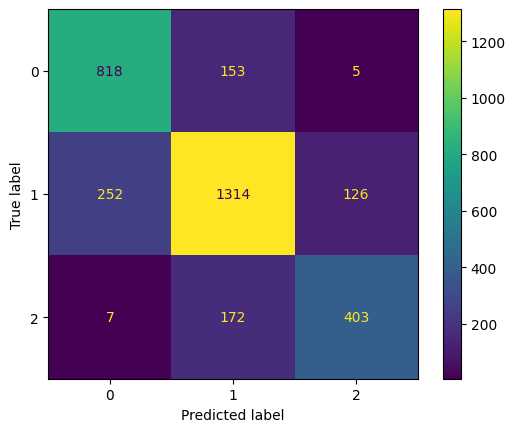

DecisionTreeClassifier()
Accuracy: 0.7744615384615384
F1: 0.7736702310718752


<Figure size 300x300 with 0 Axes>

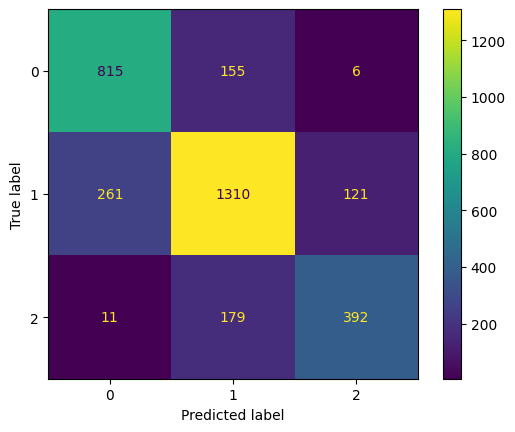

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Accuracy: 0.7981538461538461
F1: 0.7981689109406139


<Figure size 300x300 with 0 Axes>

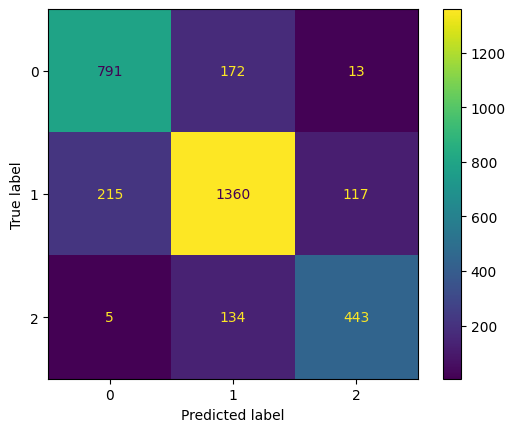

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# 'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}
classi = [KNeighborsClassifier(n_neighbors=3, leaf_size=20, algorithm='ball_tree', weights='distance'), DecisionTreeClassifier(), 
          XGBClassifier(max_depth= 16, n_estimators= 25, tree_method= 'exact', random_state=42)]

for clas in classi:
    print(clas)
    data_pred = clas.fit(X_train,y_train).predict(X_test)
    evalua(y_test, data_pred)

Accuracy: 0.6867692307692308
F1: 0.6871401963702207


<Figure size 300x300 with 0 Axes>

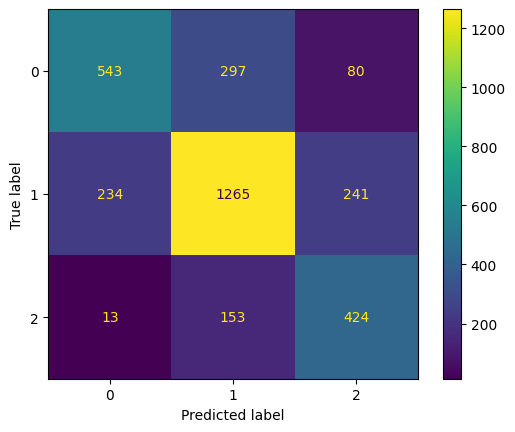

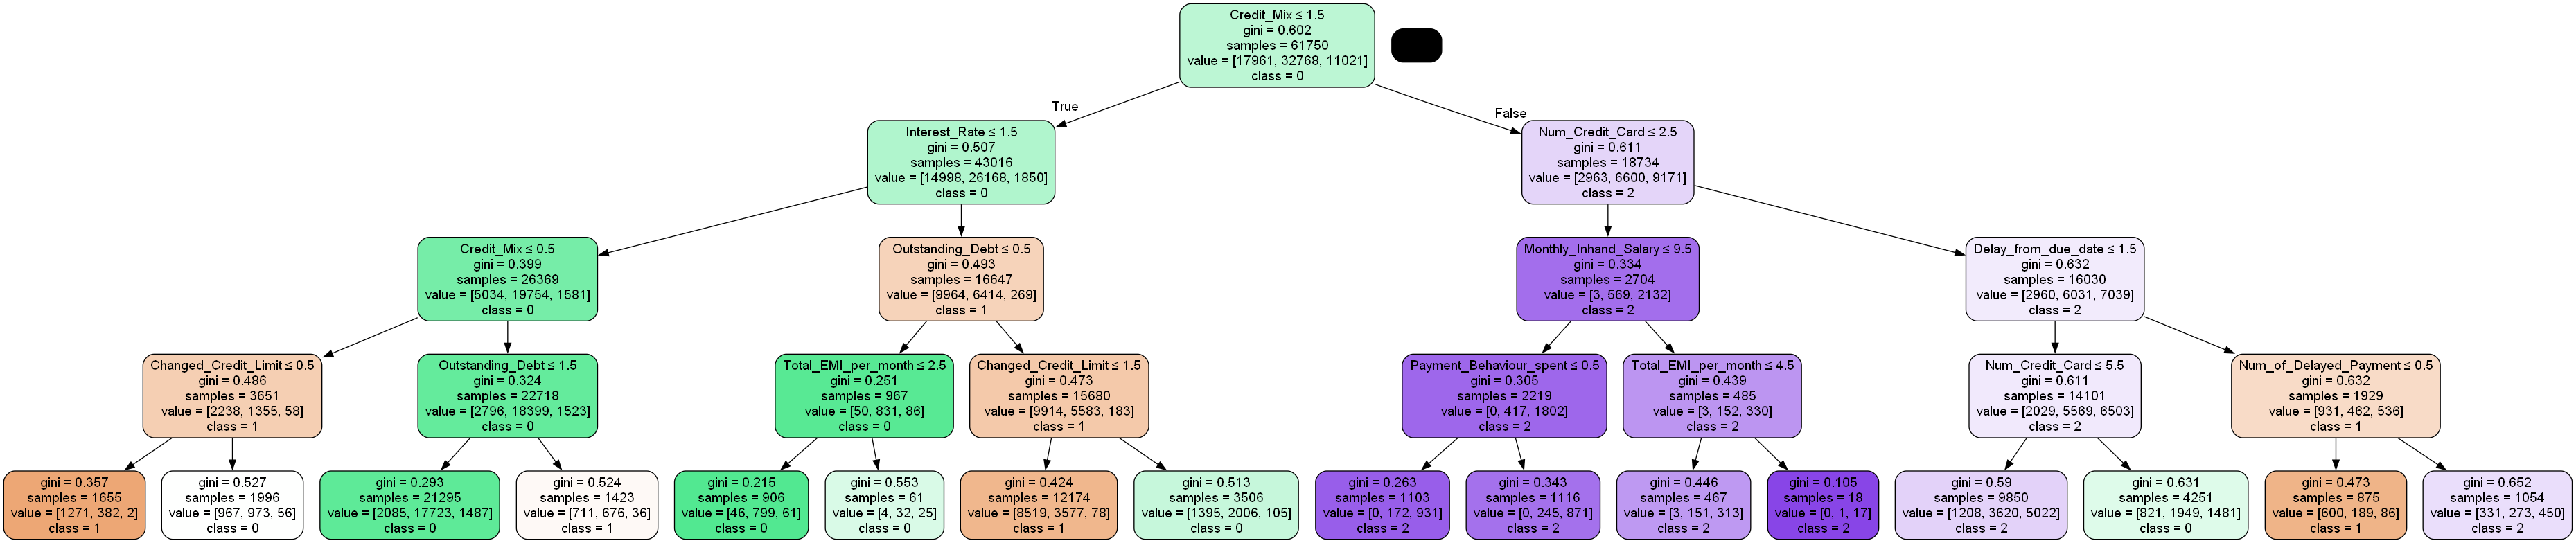

In [337]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

arbol = DecisionTreeClassifier(max_depth=4 )
arbol = arbol.fit(X_train,y_train)
data_pred = arbol.predict(X_test)
evalua(y_test, data_pred)

dot_data = export_graphviz(arbol, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=y_train.astype(str).unique(),  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree
Image(graph.create_png())

Campos más importantes:

Outstanding_Debt
Credit_Mix
Changed_Credit_Limit
Interest_Rate
Num_Credit_Card
Delay_from_due_date
Total_EMI_per_month
Monthly_Inhand_Salary
Num_Bank_Accounts
Num_of_Delayed_Payment
Amount_invested_monthly
Num_Credit_Inquiries

In [338]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


params = {
  'n_estimators': np.arange(5,51,10),
  'max_depth': np.arange(1,30,5),
  'tree_method': ['exact', 'approx', 'hist']
}

model = xgb.XGBClassifier(random_state=42)
gs = GridSearchCV(model, params, verbose=1, n_jobs=-1, cv=3)
gs.fit(X.drop( 'Credit_Score', axis=1), y)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


KeyboardInterrupt: 

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_tree_method,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
51,28.038999,0.534588,0.757517,0.054639,16,25,exact,"{'max_depth': 16, 'n_estimators': 25, 'tree_me...",0.777588,0.779573,0.777947,0.778369,0.000863,1
52,14.941393,0.877214,0.756632,0.028781,16,25,approx,"{'max_depth': 16, 'n_estimators': 25, 'tree_me...",0.776850,0.781419,0.776655,0.778308,0.002201,2
53,5.062618,0.335843,0.775679,0.071869,16,25,hist,"{'max_depth': 16, 'n_estimators': 25, 'tree_me...",0.776850,0.781419,0.776655,0.778308,0.002201,2
56,6.114050,0.111759,0.998054,0.035749,16,35,hist,"{'max_depth': 16, 'n_estimators': 35, 'tree_me...",0.776711,0.779434,0.774716,0.776954,0.001934,4
55,17.222665,0.354220,0.975826,0.032625,16,35,approx,"{'max_depth': 16, 'n_estimators': 35, 'tree_me...",0.776711,0.779434,0.774716,0.776954,0.001934,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2.533537,0.021989,0.030219,0.002736,1,15,approx,"{'max_depth': 1, 'n_estimators': 15, 'tree_met...",0.637329,0.646375,0.645989,0.643231,0.004176,85
3,0.752592,0.004392,0.025758,0.001129,1,15,exact,"{'max_depth': 1, 'n_estimators': 15, 'tree_met...",0.637329,0.646375,0.645989,0.643231,0.004176,85
2,0.243536,0.008490,0.020709,0.001350,1,5,hist,"{'max_depth': 1, 'n_estimators': 5, 'tree_meth...",0.630590,0.644529,0.612203,0.629107,0.013238,88
1,0.849265,0.004716,0.022300,0.001374,1,5,approx,"{'max_depth': 1, 'n_estimators': 5, 'tree_meth...",0.630590,0.644529,0.612203,0.629107,0.013238,88


In [ ]:
print('Mejor puntuación:', gs.best_score_)
print('Parámetros que la han conseguido:', gs.best_params_)

Mejor puntuación: 0.7783692242736843
Parámetros que la han conseguido: {'max_depth': 16, 'n_estimators': 25, 'tree_method': 'exact'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = {
  'n_neighbors': np.arange(3,6),
  'weights': ['uniform', 'distance'],
  'leaf_size': np.arange(20,50,10),
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

model = KNeighborsClassifier(weights= 'distance')
gs = GridSearchCV(model, params, verbose=1, n_jobs=-1, cv=3)
gs.fit(X.drop( 'Credit_Score', axis=1), y)
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

Fitting 3 folds for each of 72 candidates, totalling 216 fits


c:\Python310\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.74706154 0.76313845 0.73673849 0.76383077 0.73179998 0.76401536
 0.74784615 0.76350768 0.73626157 0.76395384 0.7323692  0.76413844
 0.74784615 0.76350768 0.73626157 0.76395384 0.7323692  0.76413844
 0.74818462 0.76323077 0.73647696 0.76363078 0.73246151 0.76421536
 0.74850769 0.76364615 0.73640003 0.76389232 0.73293843 0.76433844
 0.74850769 0.76364615 0.73640003 0.76389232 0.73293843 0.76433844
 0.74706154 0.76313845 0.73673849 0.76383077 0.73179998 0.76401536
 0.74784615 0.76350768 0.73626157 0.76395384 0.7323692  0.76413844
 0.74784615 0.76350768 0.73626157 0.76395384 0.7323692  0.76413844
        nan 0.76373846        nan 0.76403077        nan 0.76429229
        nan 0.76373846        nan 0.76403077        nan 0.76429229
        nan 0.76373846        nan 0.76403077        nan 0.76429229]
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
35,0.298970,0.008197,59.026311,0.381738,ball_tree,40,5,distance,"{'algorithm': 'ball_tree', 'leaf_size': 40, 'n...",0.761388,0.768865,0.762762,0.764338,0.003250,1
29,0.297921,0.011771,63.929758,0.565619,ball_tree,30,5,distance,"{'algorithm': 'ball_tree', 'leaf_size': 30, 'n...",0.761388,0.768865,0.762762,0.764338,0.003250,1
65,0.103780,0.039651,134.583059,15.471894,brute,30,5,distance,"{'algorithm': 'brute', 'leaf_size': 30, 'n_nei...",0.760881,0.768542,0.763454,0.764292,0.003183,3
59,0.099389,0.066435,150.935905,22.947874,brute,20,5,distance,"{'algorithm': 'brute', 'leaf_size': 20, 'n_nei...",0.760881,0.768542,0.763454,0.764292,0.003183,3
71,0.141238,0.057066,74.673005,23.259404,brute,40,5,distance,"{'algorithm': 'brute', 'leaf_size': 40, 'n_nei...",0.760881,0.768542,0.763454,0.764292,0.003183,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.051552,0.012397,0.030727,0.027876,brute,30,5,uniform,"{'algorithm': 'brute', 'leaf_size': 30, 'n_nei...",NaN,NaN,NaN,NaN,NaN,64
66,0.068954,0.038591,0.010769,0.008136,brute,40,3,uniform,"{'algorithm': 'brute', 'leaf_size': 40, 'n_nei...",NaN,NaN,NaN,NaN,NaN,64
68,0.076566,0.006122,0.043614,0.060276,brute,40,4,uniform,"{'algorithm': 'brute', 'leaf_size': 40, 'n_nei...",NaN,NaN,NaN,NaN,NaN,64
56,0.039175,0.002523,0.005134,0.004440,brute,20,4,uniform,"{'algorithm': 'brute', 'leaf_size': 20, 'n_nei...",NaN,NaN,NaN,NaN,NaN,64


In [ ]:
print('Mejor puntuación:', gs.best_score_)
print('Parámetros que la han conseguido:', gs.best_params_)

Mejor puntuación: 0.7643384372845207
Parámetros que la han conseguido: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


Kaggle

In [19]:
X = new_train_df[importants_cols]

X_train = X.drop('Credit_Score', axis=1)
y_train = X['Credit_Score']

X_test= preproceso(test_df)
cols = importants_cols.copy()
cols.remove('Credit_Score')
X_test = X_test[cols]


# data_pred = KNeighborsClassifier(n_neighbors=3, leaf_size=20, algorithm='ball_tree', weights='distance').fit(X_train,y_train).predict(X_test)
data_pred = XGBClassifier(max_depth= 16, n_estimators= 25, tree_method= 'exact', random_state=42).fit(X_train,y_train).predict(X_test)
data_pred

array([1, 0, 1, ..., 1, 0, 2], dtype=int64)

In [20]:
# pd.DataFrame([test_df.ID.values,data_pred], columns=['ID','TARGET'])
result = pd.DataFrame(data=test_df.ID.values , columns=['ID'])
result['TARGET'] = data_pred
result = result.replace({0: "Poor", 1:"Standard", 2:"Good"})
result.to_csv('out.csv', index=False)
result

,ID,TARGET
0,144647,Standard
1,11922,Poor
2,97127,Standard
3,129837,Good
4,29545,Poor
...,...,...
14995,42636,Standard
14996,114031,Poor
14997,85991,Standard
14998,21240,Poor
